In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
#Reading data
dataframe = pd.read_csv("C:/Users/richa/Downloads/Fish.csv")
print('Dimension of dataset= ', dataframe.shape)
dataframe.head(5)

Dimension of dataset=  (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
#Data analysis
dataset=dataframe.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
dataset.head()

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
dataset.corr()

C:\Users\richa\AppData\Local\Temp\ipykernel_6844\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [6]:
# dropping highly correlated columns
data = dataset.drop(['VerticalLen', 'DiagonalLen', 'CrossLen'], axis =1) # Can also use axis = 'columns'
print('New dimension of dataset is= ', data.shape)
data.head(3)

New dimension of dataset is=  (159, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961


Text(0.5, 1.0, 'Outlier Detection Based on Weight')

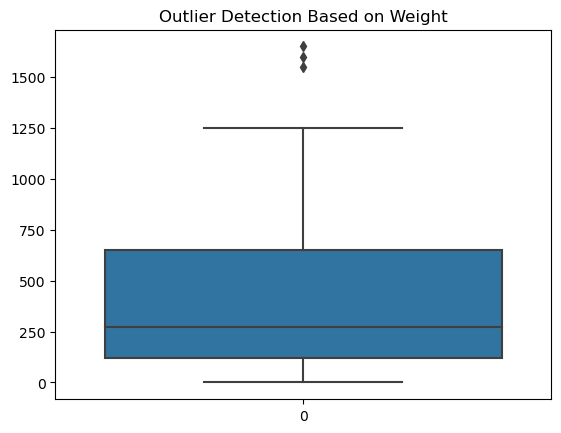

In [7]:
#detection and handling outlier
sns.boxplot(data= data['Weight'] )
plt.title('Outlier Detection Based on Weight')

In [8]:
#to get outlier values
def detect_outliers(df):
    #df1=df.select_dtypes(include=np.number)
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        upper_end=Q3+1.5*IQR
        lower_end=Q1-1.5*IQR
        outlier = df[(df > upper_end) | (df < lower_end)]
        return outlier

In [9]:
# getting outliers
for column in data.columns[1:]: 
    print('\nOutliers in column "%s" ' % column)
    outlier = detect_outliers(data[column])
    print(outlier)


Outliers in column "Weight" 
142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

Outliers in column "Height" 
Series([], Name: Height, dtype: float64)

Outliers in column "Width" 
Series([], Name: Width, dtype: float64)


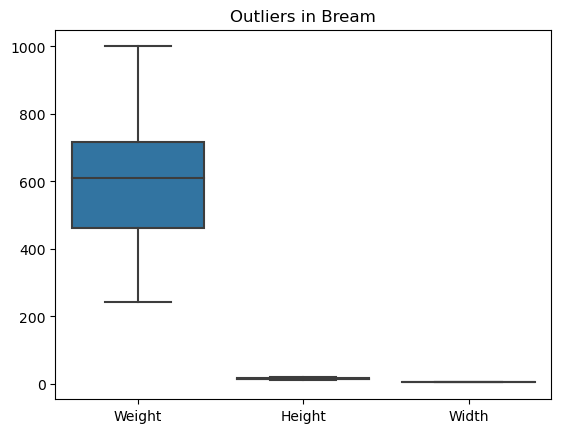

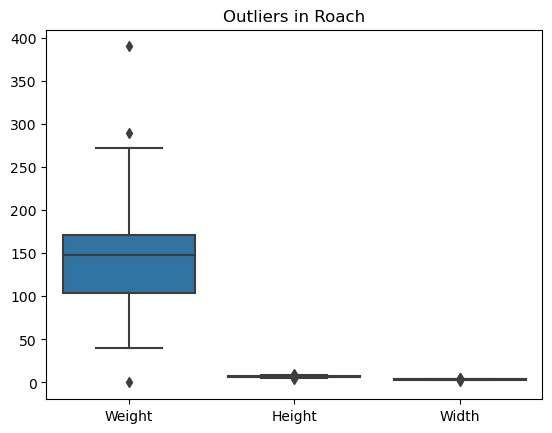

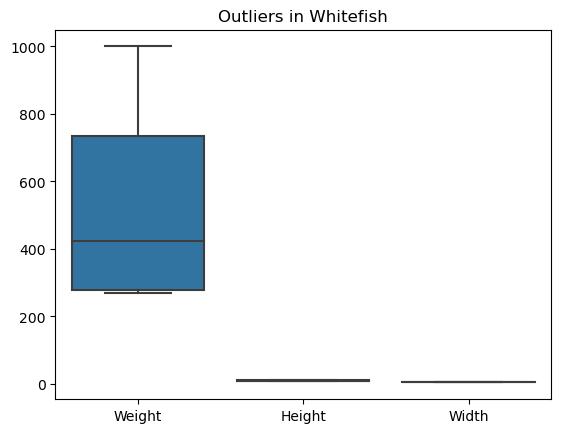

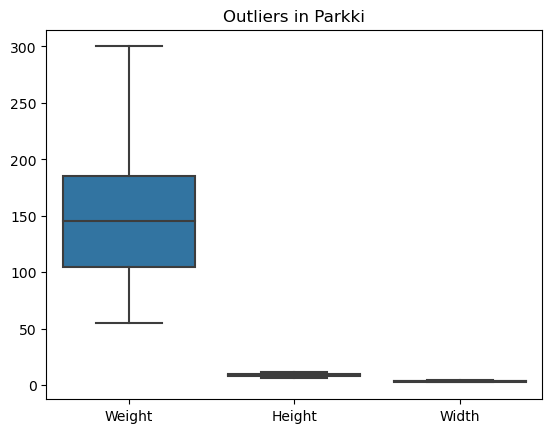

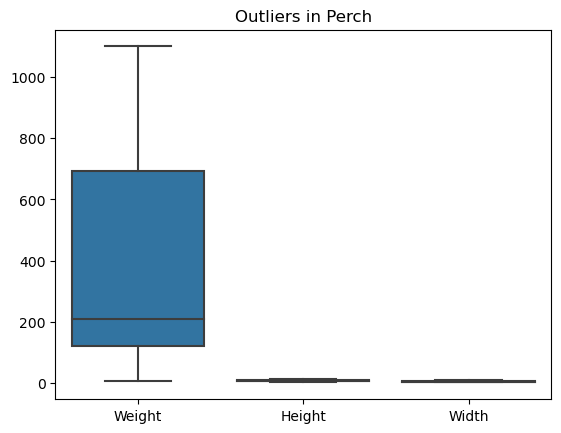

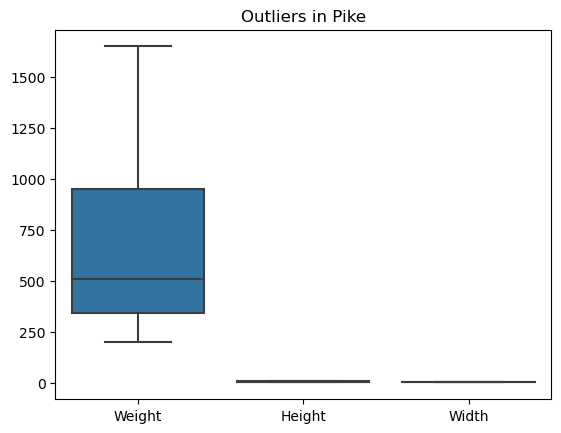

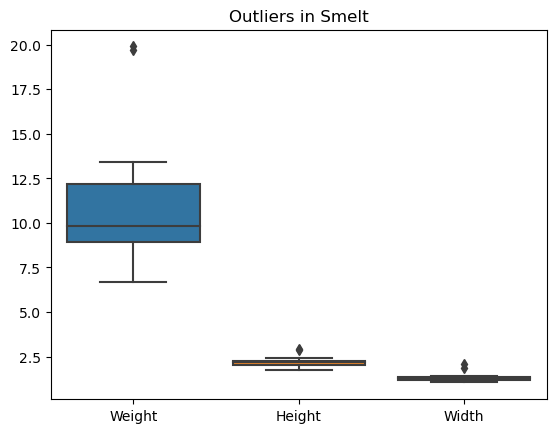

<Figure size 640x480 with 0 Axes>

In [10]:
# outliers species wise
Species= data['Species'].unique()
for sp in Species:
    sns.boxplot(data=data[data['Species']==sp])
    plt.title("Outliers in %s" %sp)
    plt.figure()

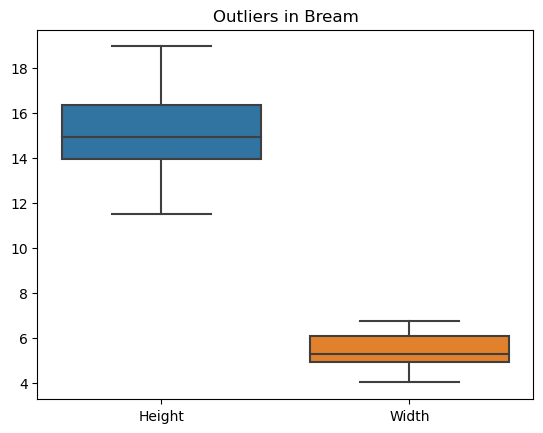

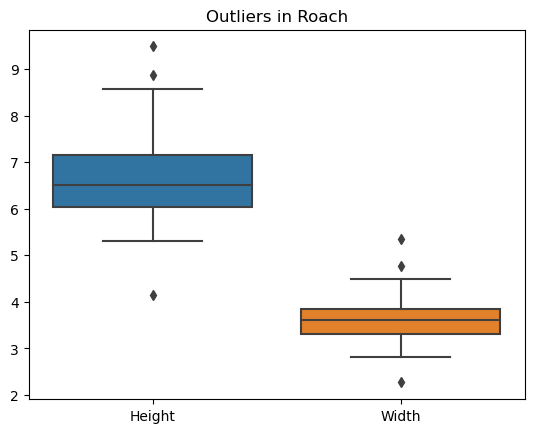

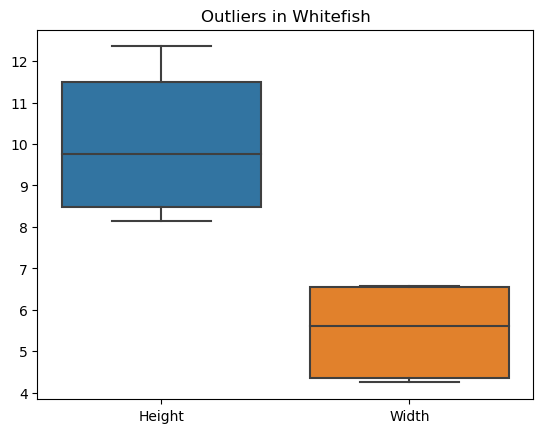

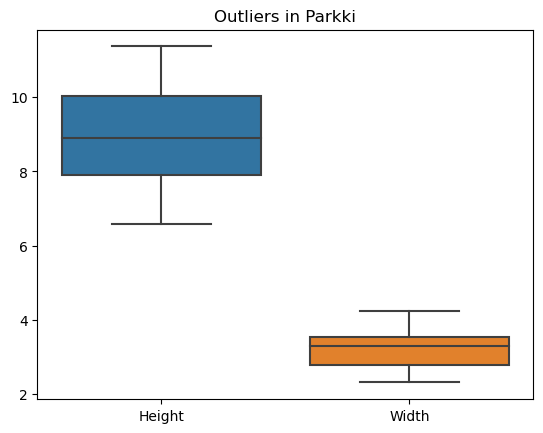

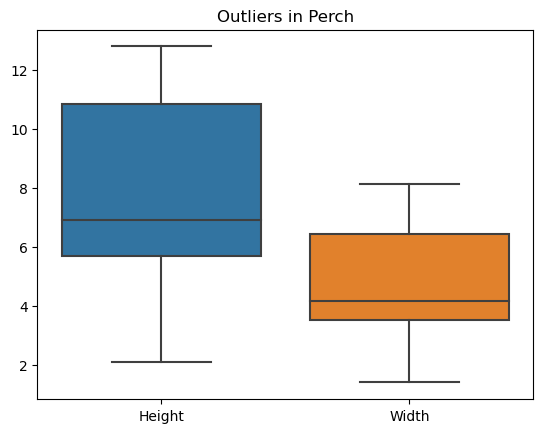

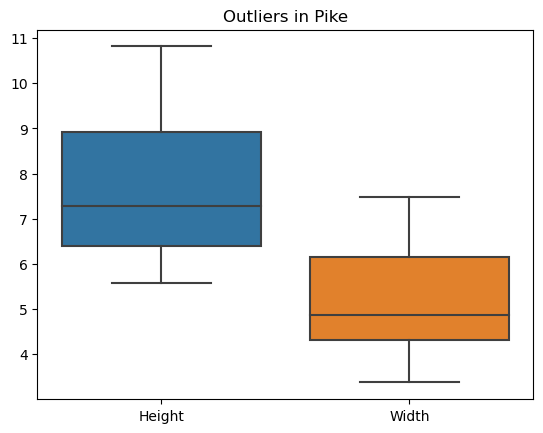

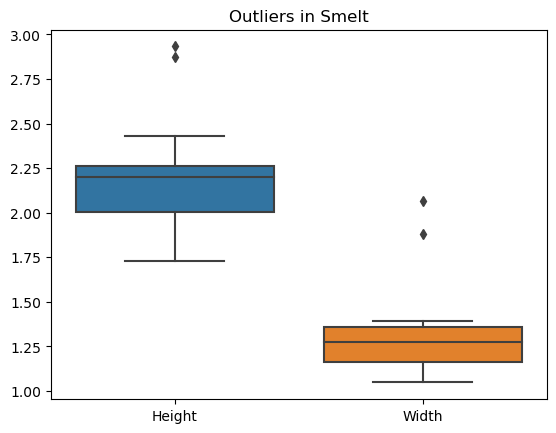

<Figure size 640x480 with 0 Axes>

In [11]:
# detecting outliers removing weight
df_temp = data.drop('Weight', axis=1)
for sp in Species:
    sns.boxplot(data=df_temp[df_temp['Species']==sp])
    plt.title("Outliers in %s" %sp)
    plt.figure()

In [12]:
# handling outliers found in Roach and Smelt
df_Roach= data[data['Species']=='Roach']
df_Roach=df_Roach.drop('Species', axis=1)
df_Smelt= data[data['Species']=='Smelt']
df_Smelt=df_Smelt.drop('Species', axis=1)
for column in df_Roach: 
    print('\nOutliers in column "%s in Roach" ' % column)
    outlier = detect_outliers(df_Roach[column])
    print(outlier)
for column in df_Smelt: 
    print('\nOutliers in column "%s in Smelt" ' % column)
    outlier = detect_outliers(df_Smelt[column])
    print(outlier)


Outliers in column "Weight in Roach" 
40      0.0
52    290.0
54    390.0
Name: Weight, dtype: float64

Outliers in column "Height in Roach" 
35    4.1472
52    8.8768
54    9.4850
Name: Height, dtype: float64

Outliers in column "Width in Roach" 
35    2.2680
53    4.7736
54    5.3550
Name: Width, dtype: float64

Outliers in column "Weight in Smelt" 
157    19.7
158    19.9
Name: Weight, dtype: float64

Outliers in column "Height in Smelt" 
157    2.8728
158    2.9322
Name: Height, dtype: float64

Outliers in column "Width in Smelt" 
157    2.0672
158    1.8792
Name: Width, dtype: float64


In [13]:
# dropping rows 35,52,53,54,157,158
clean_data=data.drop([35,52,53,54,157,158])
clean_data.shape

(153, 4)

In [14]:
for column in clean_data.columns[1:,]:
    print(clean_data[clean_data[column] <= 0])

   Species  Weight  Height   Width
40   Roach     0.0  6.4752  3.3516
Empty DataFrame
Columns: [Species, Weight, Height, Width]
Index: []
Empty DataFrame
Columns: [Species, Weight, Height, Width]
Index: []


In [15]:
clean_data=clean_data.drop(40)

In [16]:
encoded_sp= pd.get_dummies(clean_data['Species'])
encoded_sp

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
152,0,0,0,0,0,1,0
153,0,0,0,0,0,1,0
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0


In [17]:
# add new encoded data
clean_data=pd.concat([clean_data,encoded_sp], axis=1)


In [18]:
clean_data= clean_data.drop(['Species','Whitefish'], axis=1)

In [19]:
clean_data

,Weight,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,11.5200,4.0200,1,0,0,0,0,0
1,290.0,12.4800,4.3056,1,0,0,0,0,0
2,340.0,12.3778,4.6961,1,0,0,0,0,0
3,363.0,12.7300,4.4555,1,0,0,0,0,0
4,430.0,12.4440,5.1340,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
152,9.9,2.2139,1.1659,0,0,0,0,0,1
153,9.8,2.2044,1.1484,0,0,0,0,0,1
154,12.2,2.0904,1.3936,0,0,0,0,0,1
155,13.4,2.4300,1.2690,0,0,0,0,0,1


In [20]:
#build a model
x=clean_data[['Height', 'Width', 'Bream', 'Parkki' ,'Perch', 'Pike', 'Roach', 'Smelt']]
y=clean_data['Weight']

In [23]:
# Creating training and testing data
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size = 0.2)

In [24]:
x_train.shape

(121, 8)

In [30]:
#visualizing data
def polynomial_plot(feature, label):
  # Create 1D array using 'squeeze' function to reduce the 2D array to 1D array
  x_coordinates = feature
  y_coordinates = np.squeeze(label)

 # First degree polynomial function
  linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
  # Second degree polynomial function
  quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
 
  # Generate evenly spaced values
  values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

  plt.scatter(x_coordinates,y_coordinates, color='blue')  
  plt.plot(values, linear_func(values), color='red', linestyle='dashed', label='Linear Function')
  plt.plot(values, quadratic_func(values), color='cyan', label='Quadratic Function')
  plt.xlabel('%s From Test Data'%(feature.name))
  plt.ylabel('Weight')
  plt.legend()
  plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
  plt.show()  

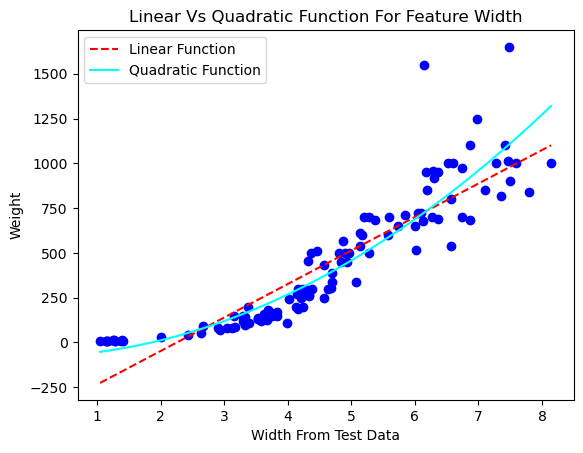

In [31]:
polynomial_plot(x_train['Width'],y_train)

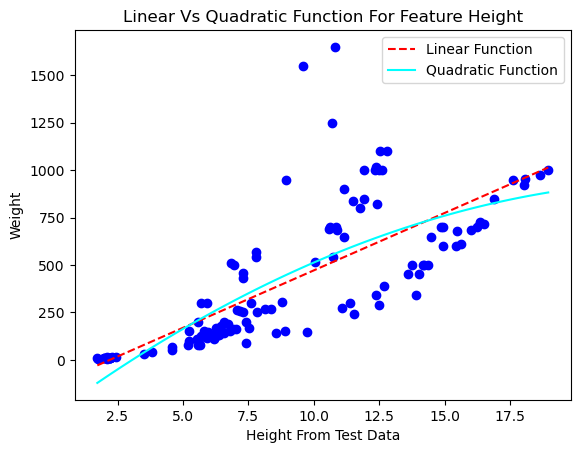

In [34]:
polynomial_plot(x_train['Height'],y_train)

In [38]:
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x_train) 
poly.fit(x_poly, y_train) 

PolynomialFeatures()

In [40]:
# OLS method training
lm = linear_model.LinearRegression() 
lm.fit(x_poly, y_train) 

LinearRegression()

In [41]:
predictions = lm.predict(poly.fit_transform(x_test))
print('r2_score= ', metrics.r2_score(y_test, predictions))

r2_score=  0.9278151789812603


Text(0.5, 1.0, 'Weight From test Data Vs Weight Predicted By Model')

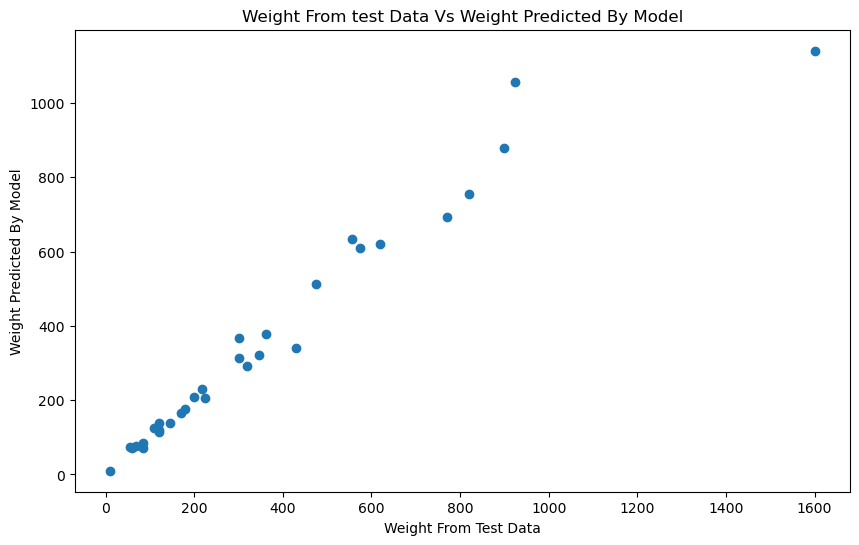

In [44]:
plt.scatter(y_test, predictions)
plt.xlabel('Weight From Test Data')
plt.ylabel('Weight Predicted By Model')
plt.title("Weight From test Data Vs Weight Predicted By Model")

Text(0.5, 1.0, 'Histogram of Residuals')

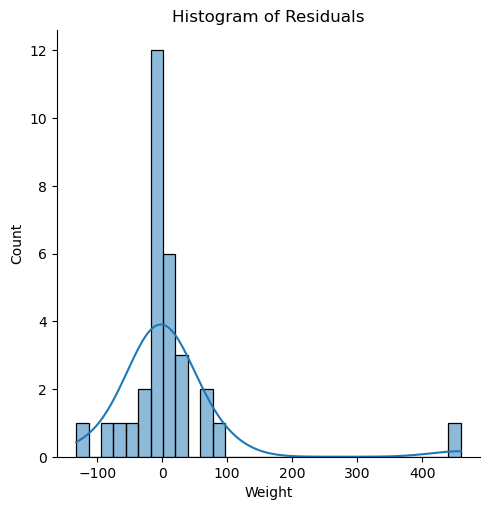

In [53]:
sns.displot((y_test-predictions), kde=True)
plt.title("Histogram of Residuals")